In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sample = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

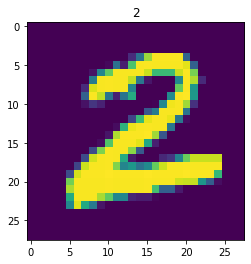

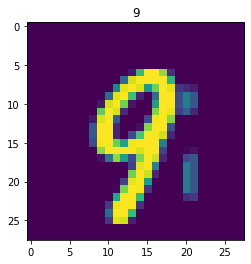

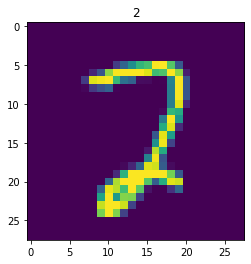

In [4]:
y = np.array(train['label'],dtype=int)
X = np.array(train.drop(['label'],axis=1),dtype=float)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=123)

for i in range(3):
    fig=plt.figure()
    plt.imshow(train_X[i].reshape([28,28]))
    plt.title(str(train_y[i]))

In [5]:
train_X = train_X.reshape( -1 , 28 , 28 , 1)
valid_X = valid_X.reshape( -1 , 28 , 28 , 1)
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)

In [6]:
train_y.shape

(33600, 10)

In [7]:
input_shape = (28, 28, 1)
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [8]:
hist = model.fit(train_X, train_y,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_y))
print("The model has successfully trained")

2022-01-08 07:20:59.988360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
263/263 [==============================] - 7s 23ms/step - loss: 3.2972 - accuracy: 0.7779 - val_loss: 0.1977 - val_accuracy: 0.9421
Epoch 2/10
263/263 [==============================] - 6s 22ms/step - loss: 0.3993 - accuracy: 0.8844 - val_loss: 0.1814 - val_accuracy: 0.9470
Epoch 3/10
263/263 [==============================] - 6s 25ms/step - loss: 0.3500 - accuracy: 0.8988 - val_loss: 0.1896 - val_accuracy: 0.9417
Epoch 4/10
263/263 [==============================] - 6s 22ms/step - loss: 0.3399 - accuracy: 0.9039 - val_loss: 0.1652 - val_accuracy: 0.9526
Epoch 5/10
263/263 [==============================] - 6s 23ms/step - loss: 0.3427 - accuracy: 0.9039 - val_loss: 0.1571 - val_accuracy: 0.9545
Epoch 6/10
263/263 [==============================] - 6s 22ms/step - loss: 0.3412 - accuracy: 0.9043 - val_loss: 0.1651 - val_accuracy: 0.9565
Epoch 7/10
263/263 [==============================] - 6s 22ms/step - loss: 0.3559 - accuracy: 0.9017 - val_loss: 0.2097 - val_accuracy: 0.9505

In [9]:
score = model.evaluate(valid_X, valid_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19675050675868988
Test accuracy: 0.9520238041877747


In [10]:
test = np.array(test,dtype=float)
test = test.reshape( -1 , 28 , 28 , 1)
test.shape

(28000, 28, 28, 1)

In [11]:
test_preds = model.predict(test)
preds = np.argmax(test_preds , axis = 1)
preds

array([2, 0, 9, ..., 3, 9, 2])

In [12]:
test_image_id = range( 1 , len(preds)+1 )

In [13]:
submit_df = {"ImageId" : test_image_id , "Label" : preds }
submit_df = pd.DataFrame(submit_df)

submit_df.to_csv('/kaggle/working/submission.csv', index=False)